In [1]:
import pandas as pd
import GetOldTweets3 as got
import glob
import plotly.graph_objects as go
from collections import defaultdict

In [2]:
def download_tweets(hashtag, max_tweets=100):
    print(f"Downloading for {hashtag}")
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(hashtag).setMaxTweets(max_tweets)
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    df = pd.DataFrame([tweet.__dict__ for tweet in tweets])
    print(df.shape)
    df.to_csv(f"data/tweets-{hashtag}.csv".replace('#', ''), index=False)

In [8]:
hashtags_to_find = ['#spirituality']
freq_dict = defaultdict(int)

In [ ]:
for hashtag_to_find in hashtags_to_find:
    download_tweets(hashtag_to_find, max_tweets=1000)

(1000, 15)


In [3]:
filenames = glob.glob("data/tweets-*.csv")
print(filenames)

['data/tweets-spirituality.csv']


In [4]:
dataframes = [pd.read_csv(filename) for filename in filenames]
df = pd.concat(dataframes)
df.shape

(1000, 15)

In [5]:
df

,username,to,text,retweets,favorites,replies,id,permalink,author_id,date,formatted_date,hashtags,mentions,geo,urls
0,spiritualhutch,NaN,Face fearlessly everything Do you look cute Wh...,0,0,0,1253242235333873665,https://twitter.com/spiritualhutch/status/1253...,2265644027,2020-04-23 08:40:07+00:00,Thu Apr 23 08:40:07 +0000 2020,#spirituality,NaN,NaN,NaN
1,mysticscribble,NaN,Have You Had Past Lives? Find Out. http://www....,0,0,0,1253241980957659137,https://twitter.com/mysticscribble/status/1253...,742108357717151746,2020-04-23 08:39:07+00:00,Thu Apr 23 08:39:07 +0000 2020,#pastlives #reincarnation #spirituality,NaN,NaN,http://www.mysticscribblers.com/past-life-ques...
2,DWKHolistic,NaN,We have created a division. A barrier is there...,0,0,0,1253239687428419584,https://twitter.com/DWKHolistic/status/1253239...,1102250482628734977,2020-04-23 08:30:00+00:00,Thu Apr 23 08:30:00 +0000 2020,#VigyanaBhairavaTantra #Tantra #Tantramassage ...,NaN,NaN,https://dwarkadhishholisticcentre.org/2020/03/...
3,obetraveller,NaN,Chat: Pol E. And Prince Paul https://youtu.be/...,0,0,0,1253239246149890048,https://twitter.com/obetraveller/status/125323...,514658718,2020-04-23 08:28:14+00:00,Thu Apr 23 08:28:14 +0000 2020,#repurposing #ebay #makemoney #spirituality #m...,NaN,NaN,https://youtu.be/UDla1yIdR4Y
4,memes4_jesus,NaN,#Spirituality #love Unisex Stylish Religion Ne...,0,0,0,1253238027020795904,https://twitter.com/memes4_jesus/status/125323...,1196394950407139328,2020-04-23 08:23:24+00:00,Thu Apr 23 08:23:24 +0000 2020,#Spirituality #love,NaN,NaN,https://memes4jesus.com/unisex-stylish-religio...
5,LikeWoman2,NaN,Η Στιγμή Της Αφύπνισης Θα Μπορούσε Να Περιγραφ...,0,0,0,1253237430376976387,https://twitter.com/LikeWoman2/status/12532374...,2808945048,2020-04-23 08:21:02+00:00,Thu Apr 23 08:21:02 +0000 2020,#likewomangr #wellness #meditation #spirituali...,NaN,NaN,https://buff.ly/2XWonnZ
6,spiritualhutch,NaN,#spirituality #evesham #cheltenham #gloucester,0,0,0,1253237195198128128,https://twitter.com/spiritualhutch/status/1253...,2265644027,2020-04-23 08:20:06+00:00,Thu Apr 23 08:20:06 +0000 2020,#spirituality #evesham #cheltenham #gloucester,NaN,NaN,NaN
7,GoFaithstrong,NaN,#God doesn't have fake friends - we gotta be R...,0,0,0,1253234475032629248,https://twitter.com/GoFaithstrong/status/12532...,4062948204,2020-04-23 08:09:17+00:00,Thu Apr 23 08:09:17 +0000 2020,#God #Christian #Spirituality #Salvation #Bibl...,NaN,NaN,NaN
8,ViveresOrdaz,NaN,#motivation #motivacion #success #exito #prosp...,0,2,0,1253234436595908608,https://twitter.com/ViveresOrdaz/status/125323...,302100266,2020-04-23 08:09:08+00:00,Thu Apr 23 08:09:08 +0000 2020,#motivation #motivacion #success #exito #prosp...,NaN,NaN,NaN
9,Nirvanahealings,NaN,#healing #divine #positive #spiritual #nirvana...,1,1,0,1253234000992272384,https://twitter.com/Nirvanahealings/status/125...,864817239333249024,2020-04-23 08:07:24+00:00,Thu Apr 23 08:07:24 +0000 2020,#healing #divine #positive #spiritual #nirvana...,NaN,NaN,NaN


In [6]:
df.columns

Index(['username', 'to', 'text', 'retweets', 'favorites', 'replies', 'id',
       'permalink', 'author_id', 'date', 'formatted_date', 'hashtags',
       'mentions', 'geo', 'urls'],
      dtype='object')

In [9]:
for index, row in df.iterrows():
    hashtags = [hashtag.replace('#', '').lower() for hashtag in str(row['hashtags']).split() if hashtag != hashtags_to_find[0]]
    for hashtag in hashtags:
        freq_dict[hashtag] += 1

In [10]:
freq_dict

defaultdict(int,
            {'pastlives': 4,
             'reincarnation': 6,
             'vigyanabhairavatantra': 2,
             'tantra': 7,
             'tantramassage': 2,
             'spirituality': 289,
             'anycenter': 1,
             'socialconditioning': 1,
             'repurposing': 1,
             'ebay': 1,
             'makemoney': 1,
             'meditation': 163,
             'purpose': 6,
             'love': 110,
             'likewomangr': 1,
             'wellness': 23,
             'awakening': 49,
             'evesham': 3,
             'cheltenham': 3,
             'gloucester': 1,
             'god': 70,
             'christian': 14,
             'salvation': 4,
             'bible': 15,
             'christ': 7,
             'faith': 45,
             'motivation': 51,
             'motivacion': 3,
             'success': 20,
             'exito': 2,
             'prosperity': 6,
             'prosperidad': 2,
             'abundance': 9,
         

In [11]:
freq_sorted = sorted(freq_dict.items(),key=lambda v: v[1], reverse=True)[:100]

In [12]:
for word, ammount in freq_sorted:
    print(word)

spirituality
spiritual
meditation
love
wisdom
inspiration
mindfulness
yoga
peace
god
happiness
consciousness
earthday
healing
life
spiritualawakening
earthday2020
motivation
religion
awakening
soul
faith
nature
satsang
art
sufism
meditate
wednesdaywisdom
mysticism
innerpeace
awareness
poetry
inspirational
spirit
energy
advaita
guru
vedanta
spiritualjourney
eckharttolle
alanwatts
selflove
quotes
mooji
rupertspira
hope
enlightenment
gratitude
philosophy
spiritualteacher
jesus
sultanulashiqeen
sultanbahoo
wednesdaymotivation
guruji
sadhguru
teacher
spiritualgrowth
believe
health
wellness
who_is_real_sadguru
mind
islam
grace
positivity
bajrangbali
mahakal
shiv
shivshankar
deepakchopra
zen
faqr
tdf
success
compassion
pray
selfcare
astrology
positivevibes
trust
lawofattraction
tarot
wednesdaythoughts
selfhelp
mentalhealth
mindset
universe
tehreekdawatefaqr
christianity
bible
paranormal
newage
coronavirus
angels
buddhism
motivationalquotes
metaphysics
christian
india


In [13]:
fig = go.Figure([go.Bar(x=[w[0] for w in freq_sorted], y=[w[1] for w in freq_sorted])])
fig.show()

In [ ]:
fig.write_html('bar_chart.html')

## Wprowadzenie do teorii grafów

Graf (G) to abstrakcyjna reprezentacja sieci. Grafy składają się z wierzchołków (V) i krawędzi (E), gdzie 𝐺 = (𝑉, 𝐸)

![Przykład grafu](grafy_1.jpeg)

Grafy mogą być użyte do wizualizacji:
* portali społecznościowych
* stron internetowych
* sieci biologicznych
* ...

Jakich analiz możemy dokonywać na grafach?
* studiować topologię i zdolność łączeniową
* wykrywanie społeczności
* identyfikacja węzłów centralnych
* przewidywać brakujące węzły
* przewidzieć brakujące krawędzie
* …

Węzły (V) na wykresie reprezentują unikalne punkty danych, które istnieją w naszych zestawie danych. W przypadku analizy hashtagów sensowne jest, aby hashtagi reprezentowały węzły w naszej sieci. Więc jeśli nasz zestaw danych #spirituality miałby tylko dwa hashtagi - #A i #B, mielibyśmy dwa węzły

![Węzły](grafy_2.png)

Krawędzie (E) to połączenia, które reprezentują pewien rodzaj relacji między węzłami. W przypadku analizy hashtagów sensowne może być przedstawienie tej relacji jako pewnego rodzaju zdarzenia, tj. Jeśli hashtag #A został wymieniony w tym samym poście co #B, zakładamy, że istnieje związek między #A i #B i dlatego stworzymy krawędź między tymi dwoma węzłami

![Krawędzie](grafy_3.png)

Gdy dodajemy hashtagi z innych postów do wykresu i modelujemy ich relacje ze wszystkimi poprzednimi postami, zaczynamy widzieć strukturę sieci.

![graf](grafy_4.png)

### Jakie aspekty teorii grafów możemy wykorzystać w naszej analizie?

Wykrywanie społeczności (_Community detection_). Możemy używać algorytmów do identyfikowania i oznaczania klastrów tematów związanych z #spirituality. W tym przykładzie mamy 14 hashtagów, wszystkie połączone na różne sposoby, ale z utworzeniem odrębnych klastrów.

![klastry](grafy_5.png)

Stopień centralności (_Betweenness Centrality_). Możemy dzięki tej mierze obliczyć, które hashtagi w sieci są szczególnie ważne w łączeniu całej sieci. Podobnie jak na lotnisku Heathrow, które łączy wiele światów, miara ta informuje nas jakie hashtagi łączą „krajobraz” duchowości?

![stopien_centralnosci](grafy_6.png)

Wizualizacje. Jeśli planujemy sieć za pomocą wykresów rozrzutu (ang. _scatterplots_), jest to bardzo przekonujący sposób na wizualizację ogromnej ilości informacji o #spirituality, które w innym przypadku byłyby niemożliwe do obejrzenia.

## Przykład badania sieci społecznościowej
[Klub Zacharego] (https://en.wikipedia.org/wiki/Zachary%27s_karate_club)

Co przedstawia ten graf? Sieć społeczną klubu karate badał Wayne W. Zachary przez okres trzech lat od 1970 do 1972 roku, dokumentując powiązania między parami członków, którzy współdziałali poza klubem. Sieć obejmuje 34 członków klubu karate. W klubie powstał konflikt między administratorem „Johnem A” a instruktorem „Mr. Hi" (pseudonimy), co doprowadziło do podziału klubu na dwie części. Połowa członków utworzyła nowy klub wokół Pana Hi; członkowie z drugiej części znaleźli nowego instruktora lub zrezygnowali z karate. Na podstawie zebranych danych Zachary poprawnie przypisał wszystkich członków klubu oprócz jednego do grup, do których faktycznie dołączyli po podziale.

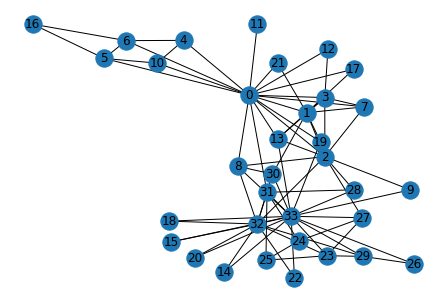

In [14]:
import networkx as nx
import matplotlib.pyplot as plt
# Load the graph
G_karate = nx.karate_club_graph()
# Find key-values for the graph
pos = nx.spring_layout(G_karate)
# Plot the graph
nx.draw(G_karate, cmap = plt.get_cmap('rainbow'), with_labels=True, pos=pos)

In [15]:
G_karate.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

In [16]:
G_karate.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])

## Analiza sieci społecznościowej hasztagów

In [17]:
from itertools import combinations 

In [18]:
list_of_hashtags = []
for index, row in df.iterrows():
    hashtags = [hashtag.replace('#', '').lower() for hashtag in str(row['hashtags']).split() if hashtag != hashtags_to_find[0]]
    if len(hashtags) > 0:
        list_of_hashtags.append(hashtags)

In [19]:
list_of_hashtags

[['pastlives', 'reincarnation'],
 ['vigyanabhairavatantra',
  'tantra',
  'tantramassage',
  'spirituality',
  'anycenter',
  'socialconditioning'],
 ['repurposing', 'ebay', 'makemoney', 'meditation', 'purpose'],
 ['spirituality', 'love'],
 ['likewomangr', 'wellness', 'meditation', 'awakening'],
 ['evesham', 'cheltenham', 'gloucester'],
 ['god', 'christian', 'spirituality', 'salvation', 'bible', 'christ', 'faith'],
 ['motivation',
  'motivacion',
  'success',
  'exito',
  'prosperity',
  'prosperidad',
  'abundance',
  'abundancia',
  'wealth',
  'riqueza',
  'money',
  'dinero',
  'coaching',
  'force',
  'fuerza',
  'learning',
  'aprendizaje',
  'sue',
  'dreams',
  'metas',
  'goals',
  'autoestima',
  'selfesteem',
  'accion',
  'action',
  'espiritualidad',
  'dificultad'],
 ['healing',
  'divine',
  'positive',
  'spiritual',
  'nirvanahealingcentre',
  'distancehealing',
  'distancereiki',
  'spiritualhealing',
  'chakra',
  'aura',
  'energy',
  'energymedicine',
  'quantumphy

In [20]:
G = nx.Graph()

In [21]:
for hashtags_ in list_of_hashtags:
    combs = combinations(hashtags_, 2)
    for c in combs:
        if not G.has_edge(*c):
            G.add_edge(c[0], c[1], weight = 1)
        else:
            G[c[0]][c[1]]['weight'] += 1

In [22]:
G.edges(data=True)

EdgeDataView([('pastlives', 'reincarnation', {'weight': 3}), ('reincarnation', 'amediting', {'weight': 1}), ('reincarnation', 'amwriting', {'weight': 1}), ('reincarnation', 'antipoetry', {'weight': 1}), ('reincarnation', 'buddha', {'weight': 1}), ('reincarnation', 'buddhist', {'weight': 1}), ('reincarnation', 'buddhism', {'weight': 1}), ('reincarnation', 'dharma', {'weight': 1}), ('reincarnation', 'esoteric', {'weight': 3}), ('reincarnation', 'ethersec', {'weight': 3}), ('reincarnation', 'indieauthor', {'weight': 1}), ('reincarnation', 'metaphysical', {'weight': 1}), ('reincarnation', 'metaphysics', {'weight': 1}), ('reincarnation', 'poems', {'weight': 3}), ('reincarnation', 'poets', {'weight': 3}), ('reincarnation', 'selfpublished', {'weight': 1}), ('reincarnation', 'spirituality', {'weight': 3}), ('reincarnation', 'starseed', {'weight': 1}), ('reincarnation', 'tantra', {'weight': 1}), ('reincarnation', 'tantric', {'weight': 1}), ('reincarnation', 'wordsmith', {'weight': 1}), ('reinca

In [33]:
G_smaller = nx.Graph()
for node_1, node_2, data in G.edges(data=True):
    if data['weight'] > 10:
        G_smaller.add_edge(node_1, node_2, weight = data['weight'])


In [34]:
len(G_smaller.edges)

538

## Wizualizacja sieci społecznościowej

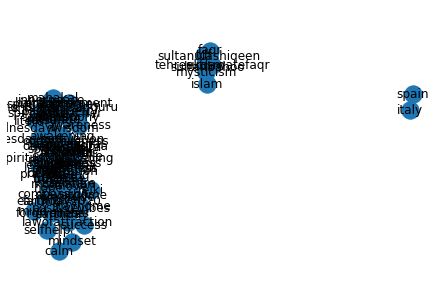

In [35]:
nx.draw(G_smaller, with_labels=True)
pos = nx.spring_layout(G_smaller)
plt.show()

In [36]:
G_smaller.remove_nodes_from(nx.isolates(G_smaller))

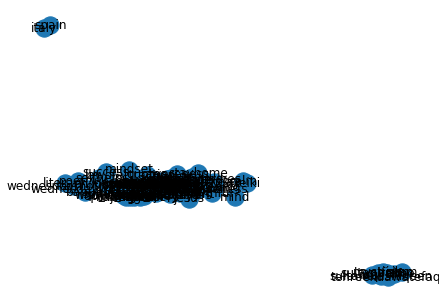

In [37]:
nx.draw(G_smaller, with_labels=True)
pos = nx.spring_layout(G_smaller)
plt.show()

In [38]:
nx.write_gexf(G_smaller, "graph.gexf")